<a href="https://colab.research.google.com/github/Piyush05062006/Machine-Learning/blob/main/MIST_Handwritten_digit_classification_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MIST Handwritten Digit classificaation using the Deep Learning (neural Network)

In [2]:
#importing the Dependencies
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

In [3]:
#Loading the MNIST data from keras datasets
(X_train,Y_train),(X_test,Y_test)=mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
type(X_train)

numpy.ndarray

In [5]:
#shape of numpy array
print(X_train.shape,Y_train.shape,X_test.shape,Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training Data=60000 images
Test data=10000 images

image dimension->28 x 28
GrayScale image->1 channel

In [6]:
#printing the 10th image
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

In [7]:
print(X_train[10].shape)

(28, 28)


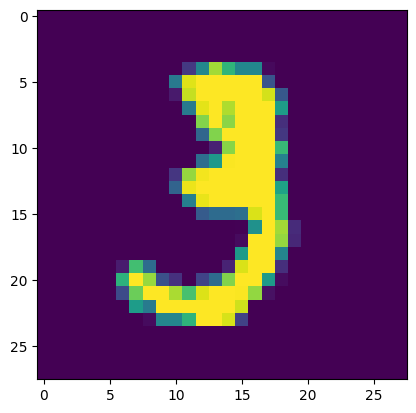

3


In [8]:
#displaying the image
plt.imshow(X_train[10]) # converting the numpy array into image
plt.show()

# printing the corresponding label
print(Y_train[10])

In [9]:
# unique values in Y_train
print(np.unique(Y_train))
#unique values in Y-train
print(np.unique(Y_test))


[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


All the images have saame dimension in this dataset,Tf not we have to resize all the images to a common dimension

In [10]:
#scaling the values
X_train=X_train/255
X_test=X_test/255
#from this array value will lie between 0 and 1

Building the Neural Network




In [11]:
# setting up the layers of the Neural Network
model=keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)), #Converts a 28×28 image into a 1D vector of 784 values
    keras.layers.Dense(50,activation='relu'),#Fully connected layer with 50 neurons ,relu helps the model learn non-linear patterns
    keras.layers.Dense(50,activation='relu'),#Another hidden layer
    keras.layers.Dense(10,activation='sigmoid') #Output layer with 10 neurons
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [12]:
#compiling the Neyral Network
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
#training the neural Netwrok
model.fit(X_train,Y_train,epochs=10) #epochs=10 → model sees all training data 10 times

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8490 - loss: 0.5236
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9554 - loss: 0.1475
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9684 - loss: 0.1068
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9747 - loss: 0.0842
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9792 - loss: 0.0685
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9824 - loss: 0.0575
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9849 - loss: 0.0494
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9865 - loss: 0.0432
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9884 - loss: 0.0375
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9887 - loss: 0.0346


training data accuracy =98.9%

Accuracy on Test Data

In [14]:
loss,accuracy=model.evaluate(X_test,Y_test)
print(accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9627 - loss: 0.1402
0.9660000205039978


test data accuracy=96.6%

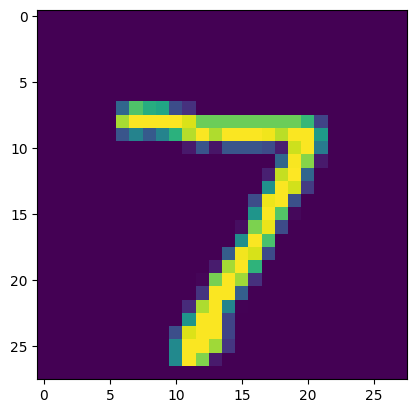

In [15]:
#first data point in X_test
plt.imshow(X_test[0])
plt.show()

In [16]:
print(Y_test[0])

7


In [17]:
Y_pred=model.predict(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [18]:
print(Y_pred.shape)

(10000, 10)


In [19]:
print(Y_pred[0])

[3.7893041e-03 4.0440932e-06 1.1379304e-01 7.8869975e-01 5.4378306e-06
 2.0154943e-01 5.4159727e-14 9.9999994e-01 8.2597164e-03 8.6684644e-01]


model.predict gives the prediction of each class for that data pont

In [21]:
#converting the prediction probability to class label
label_for_first_test_image=np.argmax(Y_pred[0]) #argmax gives index of array which is max
print(label_for_first_test_image)

7


In [22]:
#converting the prediction probability to class label for all test data point
Y_pred_labels=[np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[np.int64(7), np.int64(2), np.int64(1), np.int64(0), np.int64(4), np.int64(1), np.int64(4), np.int64(9), np.int64(5), np.int64(9), np.int64(0), np.int64(6), np.int64(9), np.int64(0), np.int64(1), np.int64(5), np.int64(9), np.int64(7), np.int64(3), np.int64(4), np.int64(9), np.int64(6), np.int64(6), np.int64(5), np.int64(4), np.int64(0), np.int64(7), np.int64(4), np.int64(0), np.int64(1), np.int64(3), np.int64(1), np.int64(3), np.int64(4), np.int64(7), np.int64(2), np.int64(7), np.int64(1), np.int64(3), np.int64(1), np.int64(1), np.int64(7), np.int64(4), np.int64(2), np.int64(3), np.int64(5), np.int64(1), np.int64(2), np.int64(4), np.int64(4), np.int64(6), np.int64(3), np.int64(5), np.int64(5), np.int64(6), np.int64(0), np.int64(4), np.int64(1), np.int64(9), np.int64(5), np.int64(7), np.int64(8), np.int64(9), np.int64(3), np.int64(7), np.int64(4), np.int64(6), np.int64(4), np.int64(3), np.int64(0), np.int64(7), np.int64(0), np.int64(2), np.int64(9), np.int64(1), np.int64(7), np.int64(3)

Y_test->True labels
Y_pred_labels->Predicted Labels

Confusion Matrix

In [23]:
conf_mat=confusion_matrix(Y_test,Y_pred_labels)

In [24]:
print(conf_mat)

tf.Tensor(
[[ 961    0    1    1    1    1    5    0    1    9]
 [   0 1108    1    6    0    1    4    1   12    2]
 [   6    2  987    6    2    0    5    7   15    2]
 [   1    0    1  986    2    1    0    2    5   12]
 [   0    0    2    1  955    0    8    2    1   13]
 [   2    0    0   30    2  823   15    2    8   10]
 [   1    2    0    1    4    5  940    0    5    0]
 [   1    1   10    4    5    0    1  973    8   25]
 [   8    0    3    4    3    1    4    1  945    5]
 [   1    2    0    7    9    0    2    2    4  982]], shape=(10, 10), dtype=int32)


Text(0.5, 47.7222222222222, 'predicted Labels')

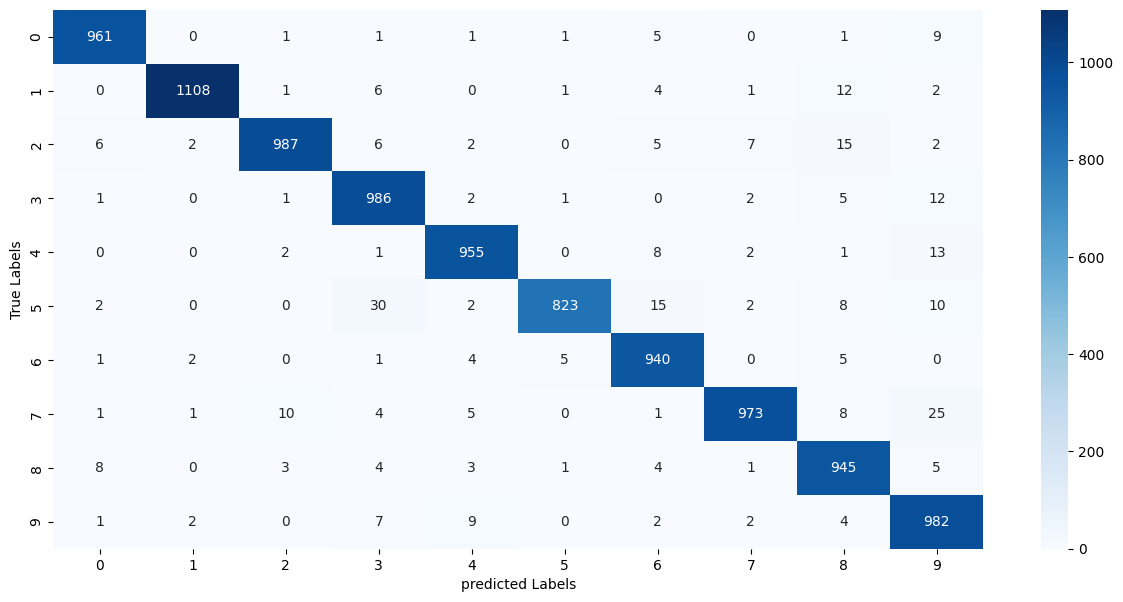

In [26]:
plt.figure(figsize=(15,7))
sns.heatmap(conf_mat,annot=True,fmt='d',cmap='Blues')# here fmt=d mean integer
plt.ylabel('True Labels')
plt.xlabel('predicted Labels')

Building a Predictive System

In [28]:
input_image_path='/content/mnist image.png'
input_image=cv2.imread(input_image_path)


In [30]:
type(input_image)

numpy.ndarray

In [31]:
print(input_image)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]


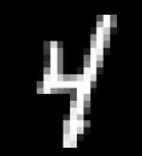

In [32]:
cv2_imshow(input_image)

In [33]:
input_image.shape

(156, 142, 3)

In [34]:
#here it is colored image so converting to greyscale image
grayscale=cv2.cvtColor(input_image,cv2.COLOR_RGB2GRAY)

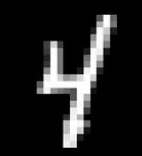

In [35]:
cv2_imshow(grayscale)

In [36]:
grayscale.shape

(156, 142)

resizing input image to the trained image size

In [41]:
input_image_resize=cv2.resize(grayscale,(28,28))

In [39]:
input_image_resize.shape

(28, 28)

In [42]:
input_image_resize=input_image_resize/255

In [43]:
image_reshaped=np.reshape(input_image_resize,[1,28,28]) #(number_of_images, 28, 28)

In [45]:
input_prediction=model.predict(image_reshaped)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step


In [46]:
print(input_prediction)

[[1.5465050e-14 1.0072745e-02 2.5518801e-08 3.7367234e-04 1.0000000e+00
  3.1074818e-04 1.4054548e-07 1.6755909e-02 2.6472282e-01 8.4106904e-01]]


In [47]:
input_pred_label=np.argmax(input_prediction)
print(input_pred_label)

4


Predictive system


Path of the image to be predicted/content/mnist image.png


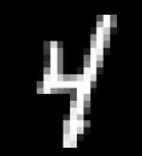

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
The Handwritte Digit is recognized as 4


In [51]:
input_image_path = input('Path of the image to be predicted: ')
input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

input_image_resize = cv2.resize(grayscale, (28, 28))
input_image_resize = input_image_resize / 255

image_reshaped = np.reshape(input_image_resize, [1, 28, 28])

input_prediction = model.predict(image_reshaped)
input_pred_label = np.argmax(input_prediction)

print('The Handwritten Digit is recognised as:', input_pred_label)
